# TC5: Signal and Image Processing; Assignment 1 Guitar tuner

The aim of this assignment is to program a functional guitar tuner that can recognise the pitch of an input sound file.

First, let's import the necessary packages.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import find_peaks
import seaborn as sns
import wave
sns.set()

Now let's load the desired file. If the file is in stereo, only the sounddata for the left will be taken.

In [38]:
filepath = './Data/string1mono.wav'

try:
    fs, data = wavfile.read(filepath)
except:
    print("ERROR: Please use a .wav file")

# From stereo to mono
try:
    if data.shape[1] > 1:
        monodata = (data[:,0] / 2 + data[:,1] / 2)
        print("File is transformed to a mono file.")
except:
    monodata = data
    print("File is already a mono file.")

File is already a mono file.


Just to get an idea about the data, it is plotted through seaborn in the plot below.

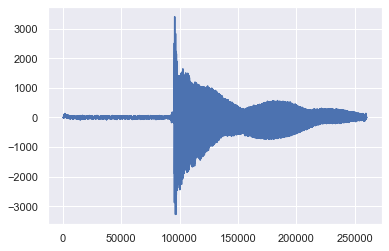

In [39]:
plt.plot(monodata)

If you divide the number of observations by the sampling frequency, you get the duration of the clip, which in this case is 5.43 seconds.

In [40]:
monodata.shape[0] / fs

5.432979166666667

In [41]:
n = len(monodata)
monodata_f = abs(np.fft.fft(monodata))
freq = np.fft.fftfreq(len(monodata)) * fs
#freq = np.where(freq)

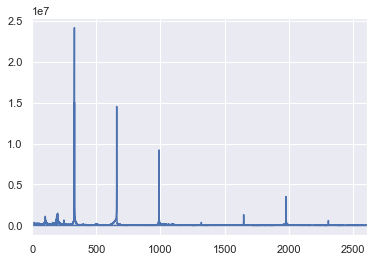

In [42]:
%matplotlib inline
plt.plot(freq, monodata_f)
plt.xlim(0, 0.01*len(freq))
plt.show()

The first high peak in the frequency spectrum is chosen to be the value for the frequency of the string. This is, although not perfect, reasonable since the sinoid function with that frequency has a high similarity to the soundfile provided.

In [43]:
peaks = freq[find_peaks(monodata_f, distance = fs/50, 
                        height = max(monodata_f)/5)[0]]
frequency = peaks[:1]

In order to determine what string is being played, the frequency of the soundfile should be compared to the possible string frequencies of a guitar. Such an array should thus be made.

An array is also made for the cent values per string in order to make the accuracy computation easier.

In [44]:
strings_dict = {"E1": 329.63, "B2": 246.94, "G3": 196.00, 
                "D4": 146.83, "A5": 110.00, "E6": 82.41}

cent_scale = {"E1": 0.15, "B2": 0.15, "G3": 0.15, 
                "D4": 0.08, "A5": 0.08, "E6": 0.04}

The following function will return the amount of cents the soundfile is off from the ideal value of the closest string. A positive outcome means that the string in the soundfile is too high pitched, and a negative number means the pitch is lower than the ideal value.

In [45]:
def calculateAccuracy(frequency, string_index, cent_scale):
    tuned_freq = strings_dict[string_index]
    cent_factor = cent_scale[string_index]
        
    diff = frequency - tuned_freq
    accuracy = diff / cent_factor
    accuracy = round(accuracy[0], 2)
    
    return accuracy

In [46]:
distance = np.inf
string_index = 0

for key, value in strings_dict.items():
    dis = abs(frequency - value)
    if dis < distance:
        distance = dis
        string_index = key

acc = calculateAccuracy(frequency, string_index, cent_scale)

print("The string being played is a " + string_index + " and the pitch is " + str(acc) + " cents off from the ideal value.")

The string being played is a E1 and the pitch is 0.16 cents off from the ideal value.
